In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()
sns.set_style('whitegrid')
#sns.set_context('talk', font_scale=0.85)


sns.set_palette('husl')

In [2]:
df_99 = pd.read_csv('Trial_99_Cleaned' )
df_051 = pd.read_csv('Trial_051_Cleaned')

In [3]:
len(df_99.Last_Name.unique()) #40 unique users

40

In [4]:
len(df_99.Last_Name) # total sample of users

102

In [5]:
len(df_051.Last_Name.unique()) #47 unique users 

47

In [6]:
len(df_051.Last_Name)

133

## Overall Experience


In [7]:
df_99['Overall_Experience'].describe()

count      102
unique       5
top       Good
freq        64
Name: Overall_Experience, dtype: object

In [8]:
df_99['Overall_Experience'].value_counts()

Good         64
Excellent    28
No effect     5
Not good      4
Awful         1
Name: Overall_Experience, dtype: int64

In [9]:
#The general overall experience represented by its proportions 
(df_99['Overall_Experience'].value_counts()) / df_99['Overall_Experience'].value_counts().sum()


Good         0.627451
Excellent    0.274510
No effect    0.049020
Not good     0.039216
Awful        0.009804
Name: Overall_Experience, dtype: float64

In [10]:
pd.crosstab(columns=df_99['Overall_Experience'], index=df_99['User_Status'], margins=True)

Overall_Experience,Awful,Excellent,Good,No effect,Not good,All
User_Status,,,,,,
Non-user,0,5,27,4,1,37
XNootropic User,1,23,36,1,3,64
All,1,28,63,5,4,101


In [11]:
#the proportions of overall experience based on overall experience 
pd.crosstab(columns=df_99['Overall_Experience'], index=df_99['User_Status']).apply(lambda x : x/x.sum(), axis=1)

Overall_Experience,Awful,Excellent,Good,No effect,Not good
User_Status,,,,,
Non-user,0.000000,0.135135,0.72973,0.108108,0.027027
XNootropic User,0.015625,0.359375,0.56250,0.015625,0.046875


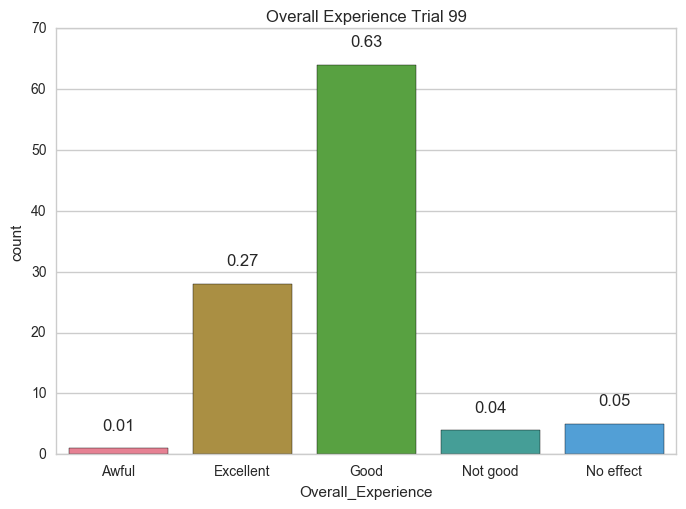

In [12]:
ax = sns.countplot(x="Overall_Experience", data=df_99, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'])
ax.set_title('Overall Experience Trial 99')

total = (len(df_99))
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2., height + 3, '{:1.2f}'.format(height/total), ha='center')
plt.show()

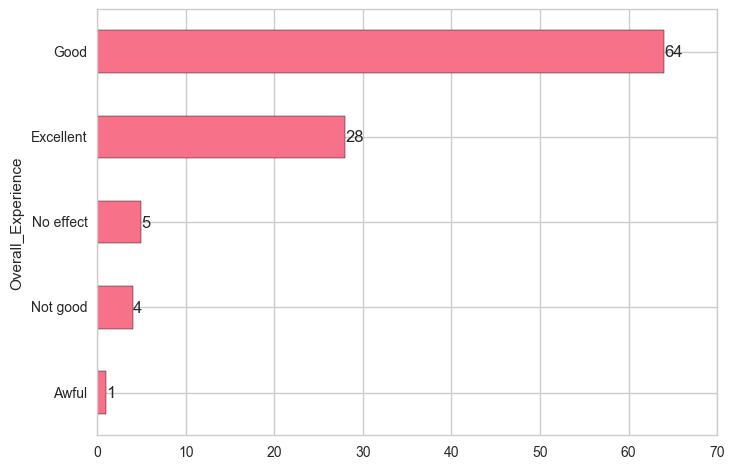

In [13]:
g = df_99.groupby(['Overall_Experience']).size().sort_values(ascending=True)
g.plot(kind='barh')

for y, x in enumerate(g):
    plt.annotate(str(x), xy=(x,y), va='center')

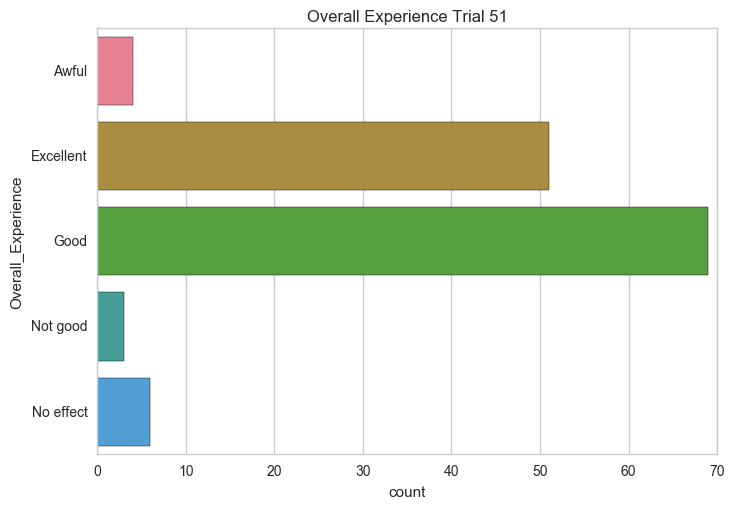

In [14]:
sns.countplot(y="Overall_Experience", data=df_051, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'])
plt.title('Overall Experience Trial 51')


In [15]:
df_99.groupby(['User_Status', 'Overall_Experience']).size()


User_Status      Overall_Experience
Non-user         Excellent              5
                 Good                  27
                 No effect              4
                 Not good               1
XNootropic User  Awful                  1
                 Excellent             23
                 Good                  36
                 No effect              1
                 Not good               3
dtype: int64

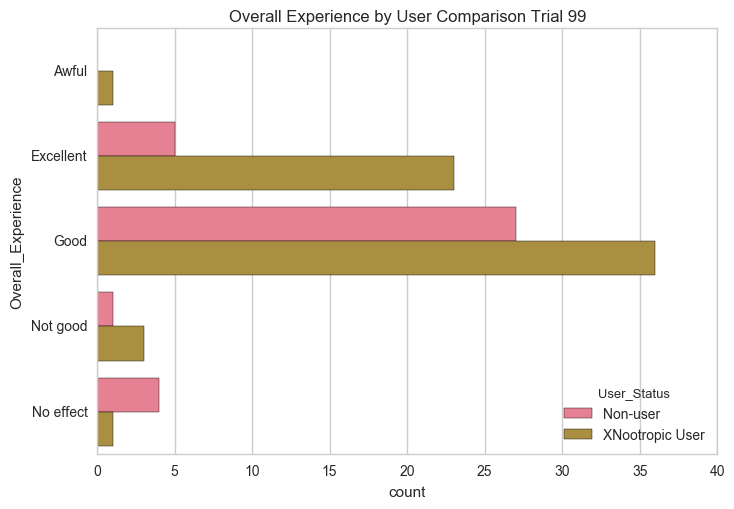

In [16]:
sns.countplot(y="Overall_Experience",hue='User_Status', data=df_99, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'] )
plt.title('Overall Experience by User Comparison Trial 99')

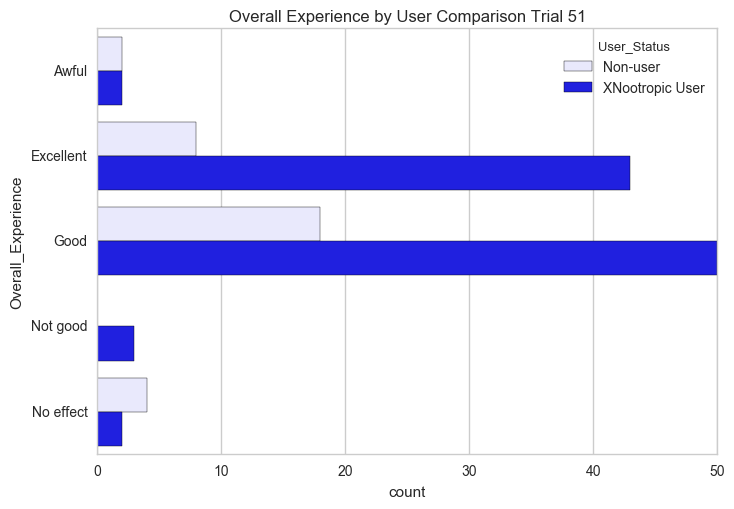

In [17]:
sns.countplot(y="Overall_Experience",hue='User_Status', data=df_051, order=['Awful', 'Excellent', 'Good', 'Not good', 'No effect'], color='Blue' )
plt.title('Overall Experience by User Comparison Trial 51')

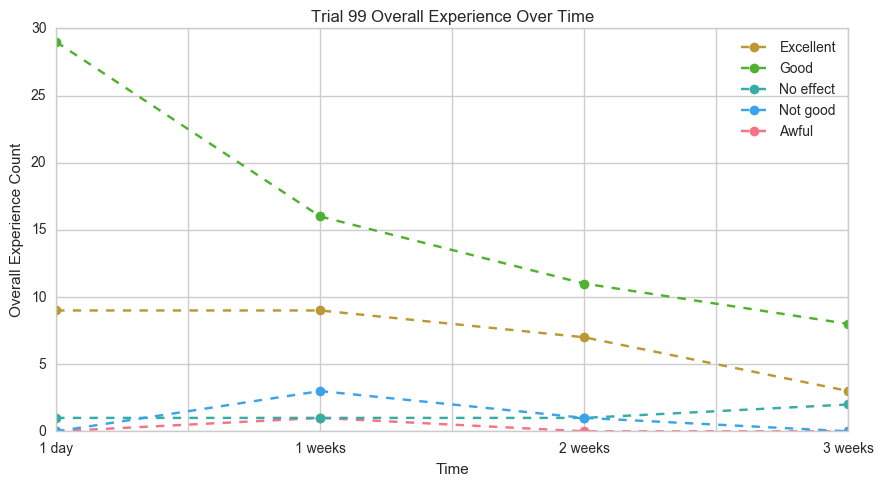

In [18]:
#comparing the counts of overall experience values over time 
OE_overtime = pd.crosstab(index=df_99.Version_Duration, columns=df_99.Overall_Experience)


f, ax = plt.subplots(1)
OE_overtime.plot(marker='o', figsize=(9,5), linestyle='--',ax=ax)
plt.title('Trial 99 Overall Experience Over Time')
plt.xlabel('Time')
plt.ylabel('Overall Experience Count')
plt.tight_layout()


#plt.legend(['Excellent','Good','No effect','Not good', 'No effect'])



handles,labels = ax.get_legend_handles_labels()

handles = [ handles[1], handles[2], handles[3], handles[4], handles[0]]
labels = [ labels[1], labels[2], labels[3], labels[4], labels[0]]

ax.legend(handles,labels,loc=1)


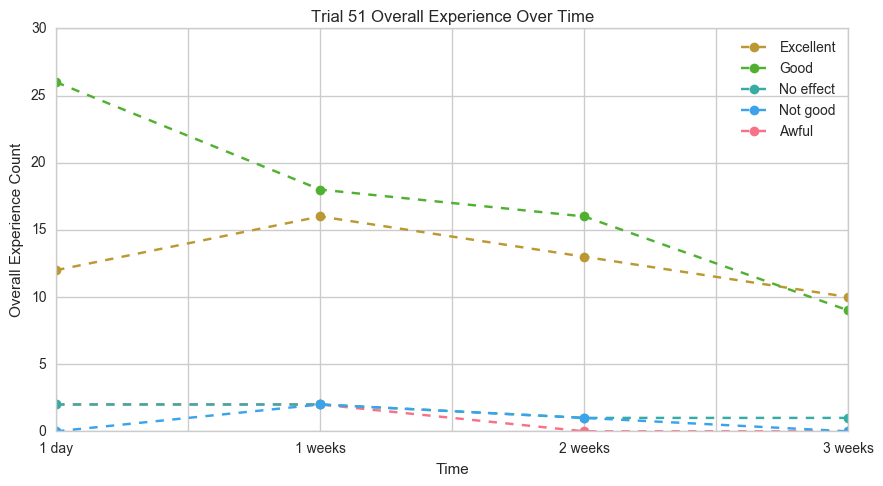

In [19]:
#comparing the counts of overall experience values over time 
OE_overtime = pd.crosstab(index=df_051.Version_Duration, columns=df_051.Overall_Experience)


f, ax = plt.subplots(1)
OE_overtime.plot(marker='o', figsize=(9,5), linestyle='--',ax=ax)
plt.title('Trial 51 Overall Experience Over Time')
plt.xlabel('Time')
plt.ylabel('Overall Experience Count')
plt.tight_layout()


#plt.legend(['Excellent','Good','No effect','Not good', 'No effect'])



handles,labels = ax.get_legend_handles_labels()

handles = [ handles[1], handles[2], handles[3], handles[4], handles[0]]
labels = [ labels[1], labels[2], labels[3], labels[4], labels[0]]

ax.legend(handles,labels,loc=1)


In [20]:
#comparing between users and non-users based on their overall experience over time

OE_USER_COMP = pd.crosstab(index=[df_99['Version_Duration'],df_99['User_Status']], columns=df_99['Overall_Experience'],)

OE_USER_COMP

Overall_Experience                Awful  Excellent  Good  No effect  Not good
Version_Duration User_Status                                                 
1 day            Non-user             0          2    12          0         0
                 XNootropic User      0          7    17          1         0
1 weeks          Non-user             0          1     8          1         1
                 XNootropic User      1          8     8          0         2
2 weeks          Non-user             0          1     4          1         0
                 XNootropic User      0          6     6          0         1
3 weeks          Non-user             0          1     3          2         0
                 XNootropic User      0          2     5          0         0

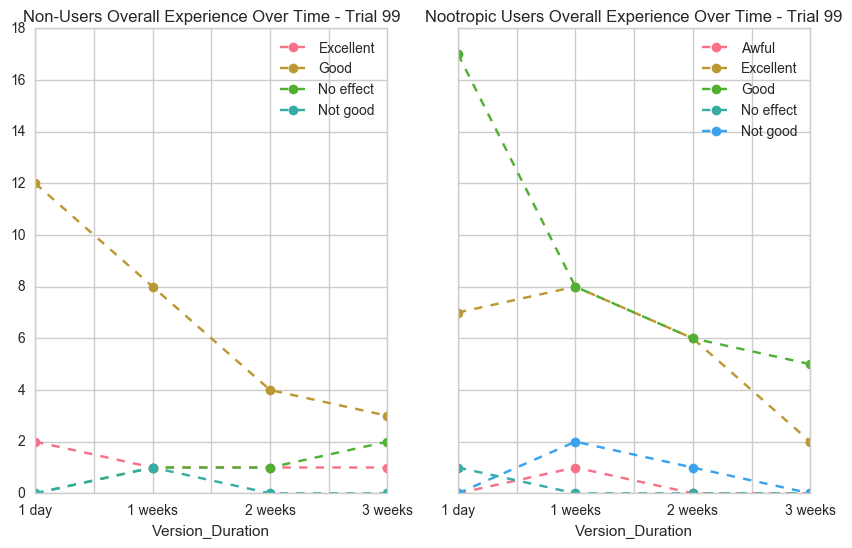

In [21]:
f, (ax1, ax2) = plt.subplots(1, 2, sharey=True, sharex=True,figsize=(10,6))


non_users = df_99[df_99.User_Status=='Non-user']
n_users = pd.crosstab(index=non_users['Version_Duration'], columns=non_users['Overall_Experience'])
n_users.plot(marker='o', linestyle='--', ax=ax1,legend=True )
ax1.set_title('Non-Users Overall Experience Over Time - Trial 99')

handles1,labels1 = ax1.get_legend_handles_labels()

handles1 = [ handles1[i] for i in range(len(handles1))]
labels1 = [ labels1[i] for i in range(len(labels1)) ]

ax1.legend(handles1,labels1,loc=1)

users = df_99[df_99.User_Status=='XNootropic User']
users = pd.crosstab(index=users['Version_Duration'], columns=users['Overall_Experience'])
users.plot(marker='o', linestyle='--', ax=ax2, legend=True)
ax2.set_title('Nootropic Users Overall Experience Over Time - Trial 99')

handles2,labels2 = ax2.get_legend_handles_labels()

handles2 = [handles2[i] for i in range(len(handles2))]
labels2 = [ labels2[i] for i in range(len(labels2)) ]

ax2.legend(handles2,labels2,loc=1)


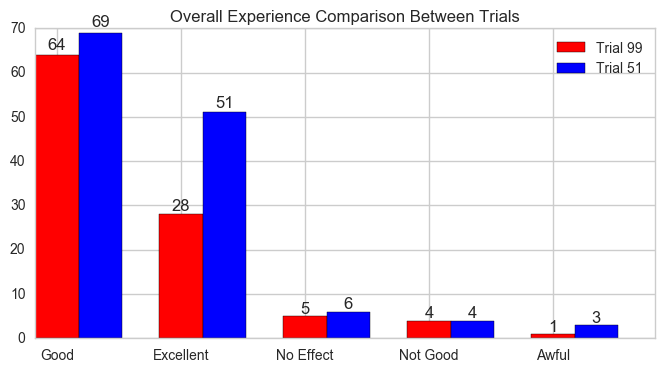

In [22]:
N = 5
ind = np.arange(N)
width = 0.35

fig, ax = plt.subplots(figsize=(8,4))
p1 = df_99['Overall_Experience'].value_counts()
p2 = df_051['Overall_Experience'].value_counts()

bar1 = ax.bar(ind, p1, width, color='r')

bar2 = ax.bar(ind + width, p2,width,  color='b')

ax.set_xticks(ind + width /2)
ax.set_xticklabels(['Good','Excellent', 'No Effect', 'Not Good', 'Awful'])
ax.set_title('Overall Experience Comparison Between Trials')
ax.legend(('Trial 99', 'Trial 51'))


def autolabel(rects):
    #attach text label aove each bar displaying its height
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width() /2., 1.01 * height, '%d' % int(height), ha='center', va='bottom')
autolabel(bar1)
autolabel(bar2)
plt.show()

In [54]:
rating = {'Excellent': 'High',
          'Good':'High',
          'No effect': 'Low',
          'Not good':'Low',
          'Awful': "Low"}

In [55]:
#changing the categorical/ordinal variables into numeric values and creating a new column with the numeric rank values
overall_exp_rank = {'Excellent': 5, 'Good':4, 'No effect': 3, 'Not good':2, 'Awful':1}
df_99['Overall_Exp_Rating'] = df_99['Overall_Experience'].map(rating)

In [57]:
df_051['Overall_Exp_Rating'] = df_051['Overall_Experience'].map(rating)

In [29]:
x_order1 = ['Excellent', 'OK', 'Poor']
x_order2 = ['Improved', 'No effect', 'Less good']

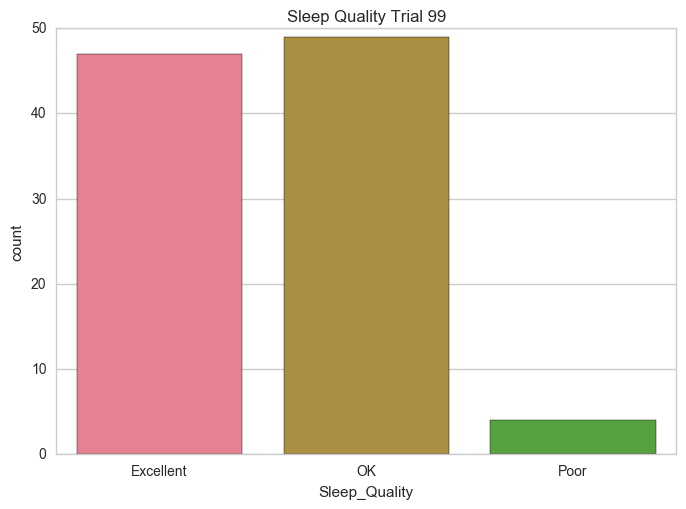

In [58]:
sns.countplot(x="Sleep_Quality",  data=df_99, order= x_order1)
plt.title('Sleep Quality Trial 99')

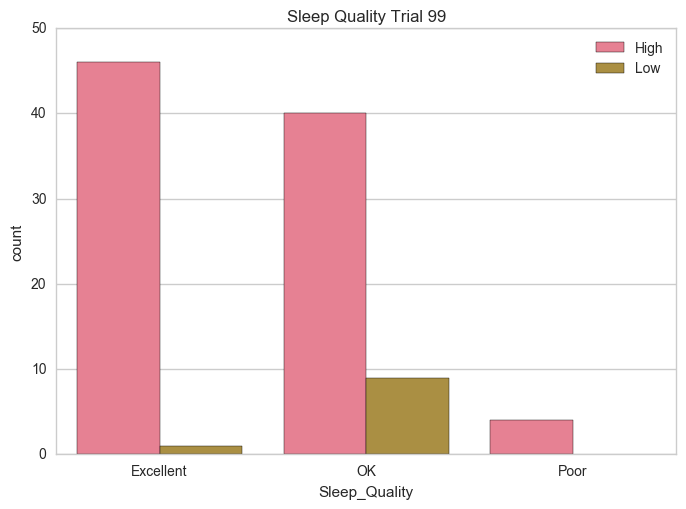

In [60]:
sns.countplot(x="Sleep_Quality",hue='Overall_Exp_Rating',   data=df_99, order= x_order1)
plt.title('Sleep Quality Trial 99')
plt.legend(loc='upper right')

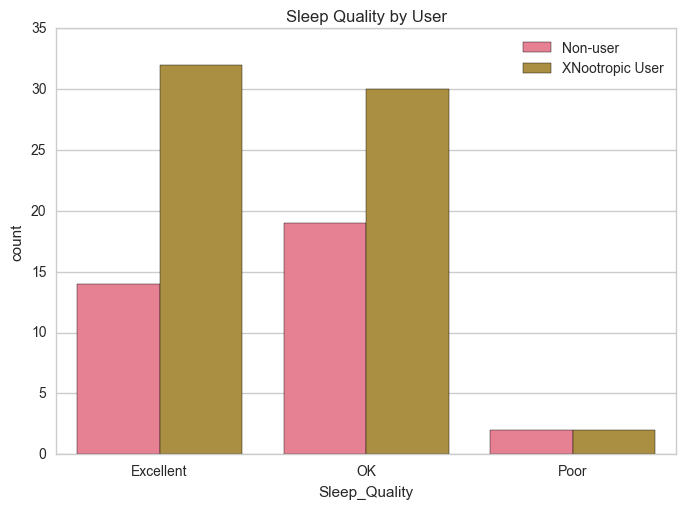

In [61]:
sns.countplot(x="Sleep_Quality", hue='User_Status',  data=df_99, order=x_order1)
plt.legend(loc='upper right')
plt.title('Sleep Quality by User')


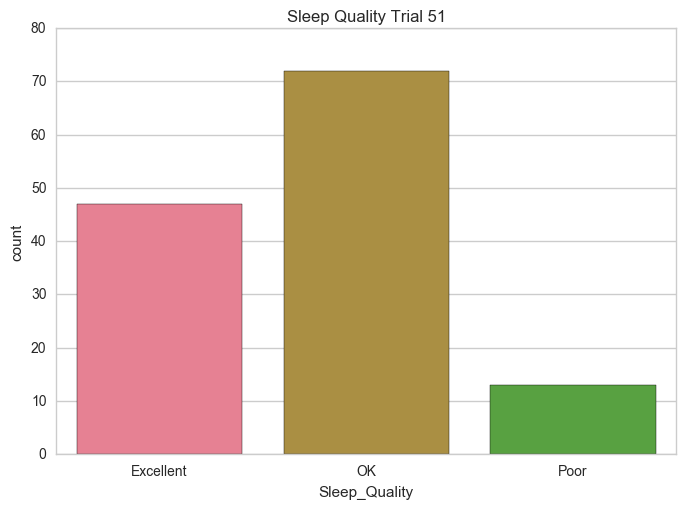

In [62]:
sns.countplot(x="Sleep_Quality",  data=df_051, order= x_order1)
plt.title('Sleep Quality Trial 51')

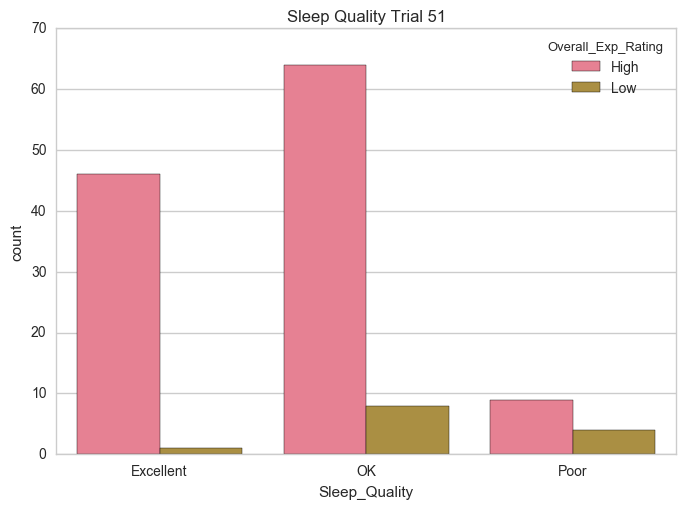

In [64]:
sns.countplot(x="Sleep_Quality",hue='Overall_Exp_Rating',  data=df_051, order= x_order1)
plt.title('Sleep Quality Trial 51')

# Focus, Attention, and Concentration

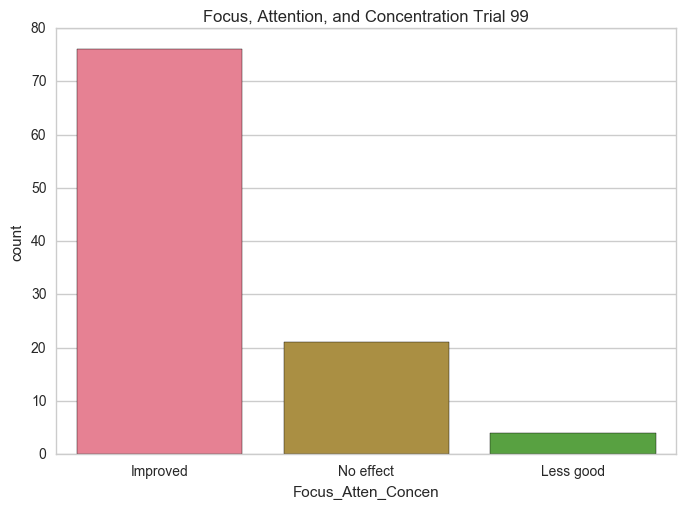

In [65]:
sns.countplot(x='Focus_Atten_Concen', data=df_99, order=x_order2)
plt.title('Focus, Attention, and Concentration Trial 99')

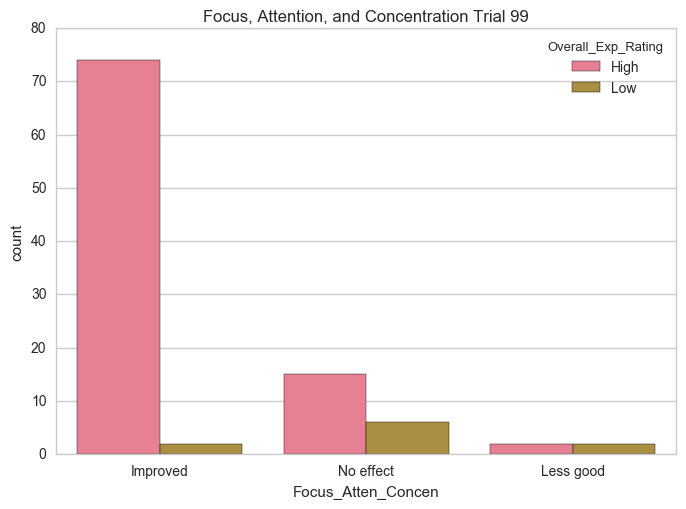

In [68]:
sns.countplot(x='Focus_Atten_Concen',hue='Overall_Exp_Rating', data=df_99, order=x_order2)
plt.title('Focus, Attention, and Concentration Trial 99')

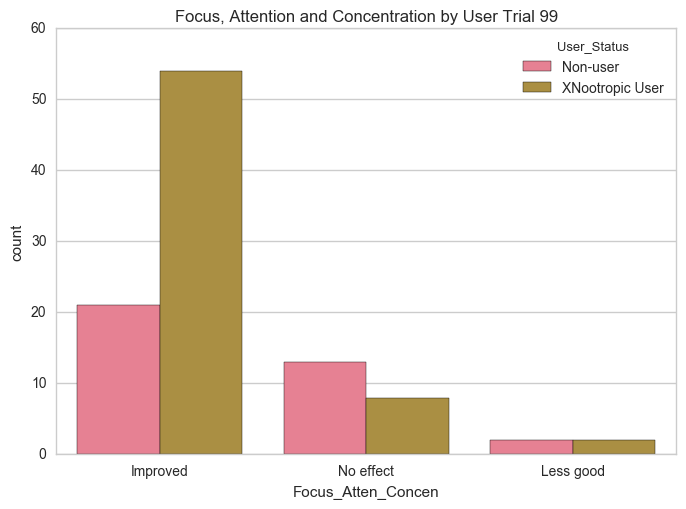

In [75]:
sns.countplot(x='Focus_Atten_Concen', data=df_99, hue='User_Status', order=x_order2)
plt.title('Focus, Attention and Concentration by User Trial 99')

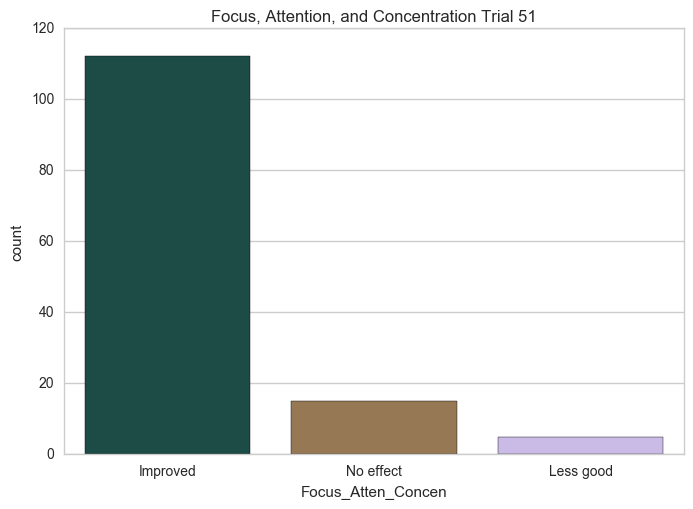

In [74]:
sns.countplot(x='Focus_Atten_Concen', data=df_051, order=x_order2, palette='cubehelix')
plt.title('Focus, Attention, and Concentration Trial 51')

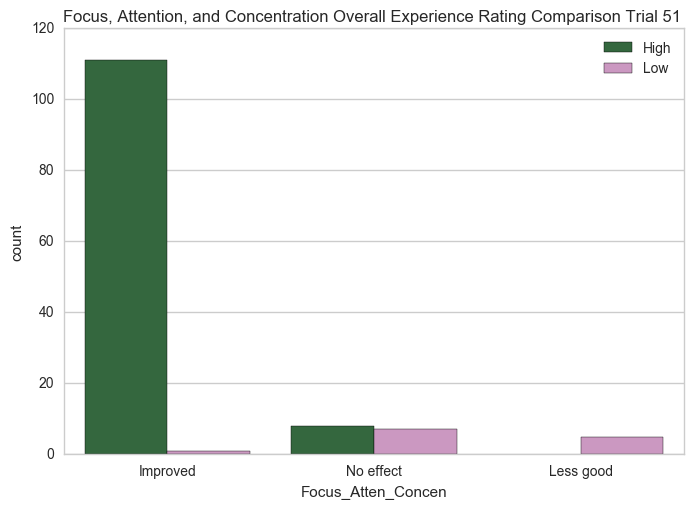

In [80]:
sns.countplot(x='Focus_Atten_Concen', hue='Overall_Exp_Rating',data=df_051, order=x_order2, palette='cubehelix')
plt.title('Focus, Attention, and Concentration Overall Experience Rating Comparison Trial 51 ')
plt.legend(loc='upper right')

## Memory

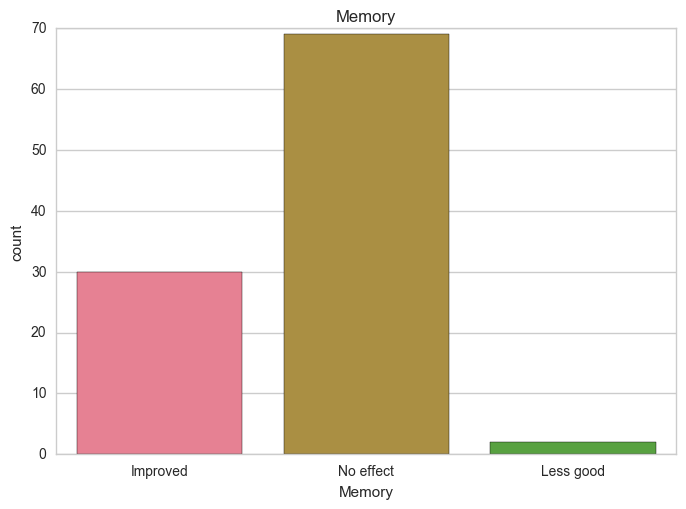

In [34]:
sns.countplot(x='Memory', data=df_99, order=x_order2)
plt.title('Memory')

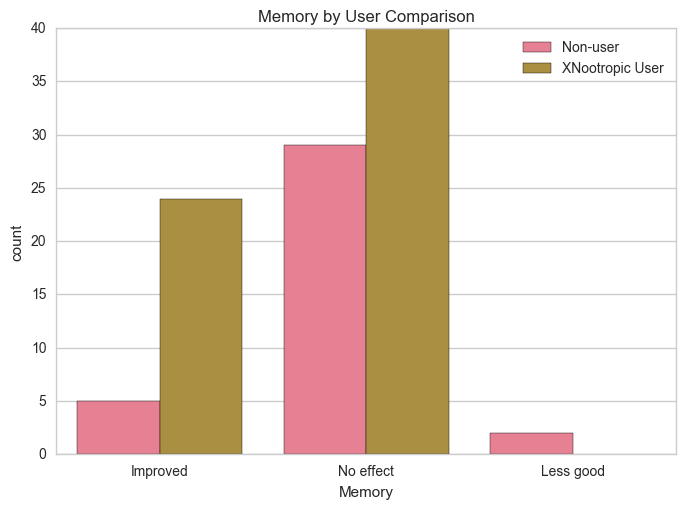

In [76]:
sns.countplot(x='Memory', data=df_99, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Memory by User Comparison')

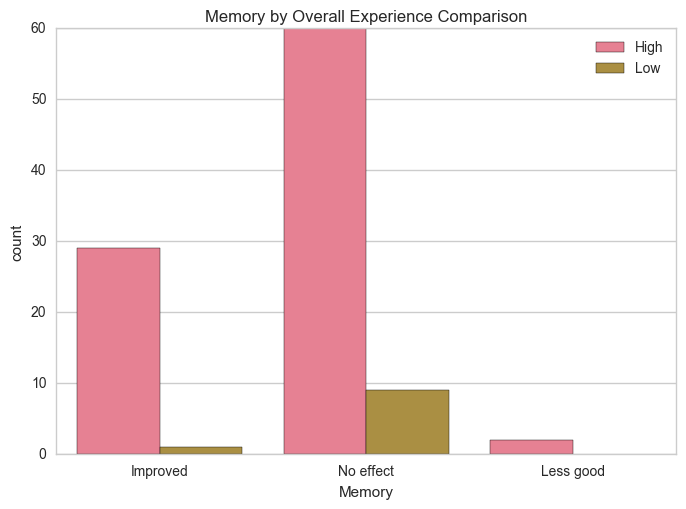

In [79]:
sns.countplot(x='Memory', hue='Overall_Exp_Rating',data=df_99, order=x_order2)
plt.legend(loc='upper right')
plt.title('Memory by Overall Experience Comparison')

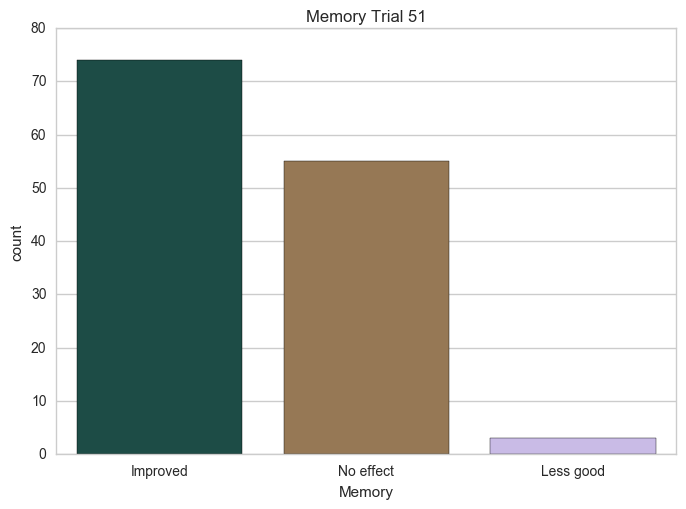

In [86]:
sns.countplot(x='Memory', data=df_051, order=x_order2, palette='cubehelix')
plt.legend(loc='upper right')
plt.title('Memory Trial 51')

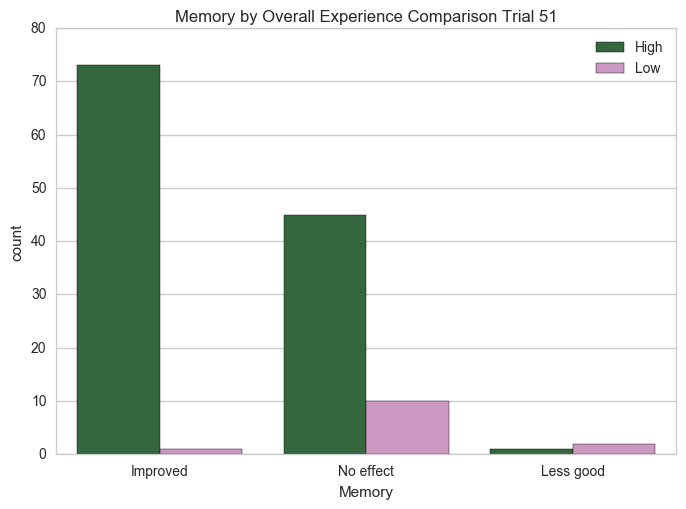

In [83]:
sns.countplot(x='Memory', hue='Overall_Exp_Rating',data=df_051, order=x_order2, palette='cubehelix')
plt.legend(loc='upper right')
plt.title('Memory by Overall Experience Comparison Trial 51')

# Drive, Passion and Motivation

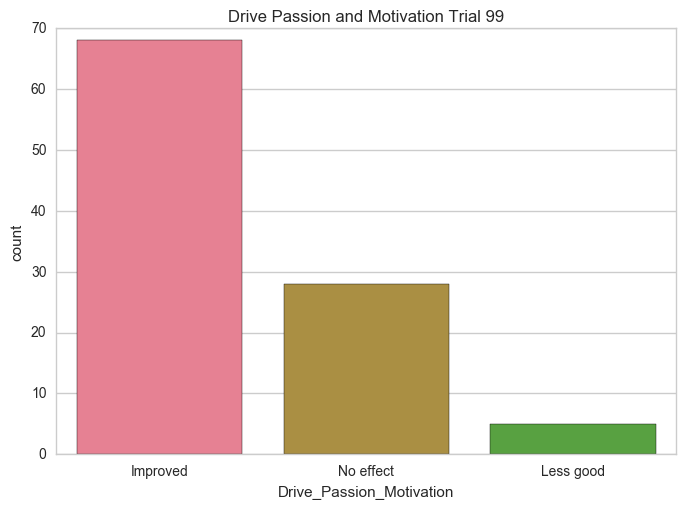

In [87]:
sns.countplot(x='Drive_Passion_Motivation', data=df_99, order=x_order2)
plt.title('Drive Passion and Motivation Trial 99')

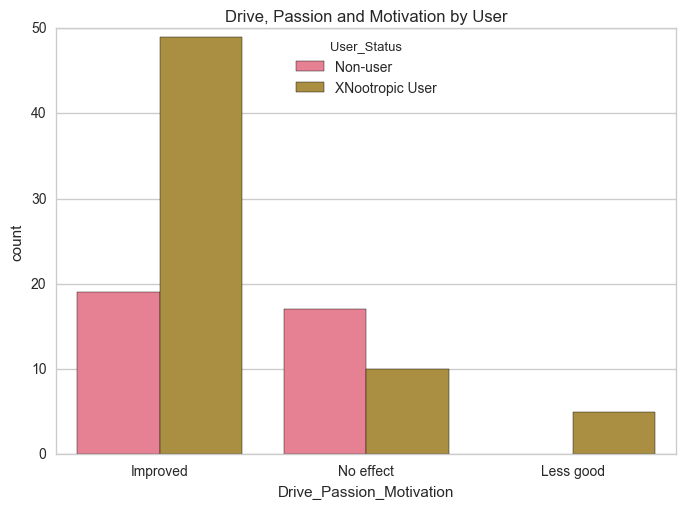

In [88]:
sns.countplot(x='Drive_Passion_Motivation', data=df_99, hue='User_Status', order=x_order2)
plt.title('Drive, Passion and Motivation by User')

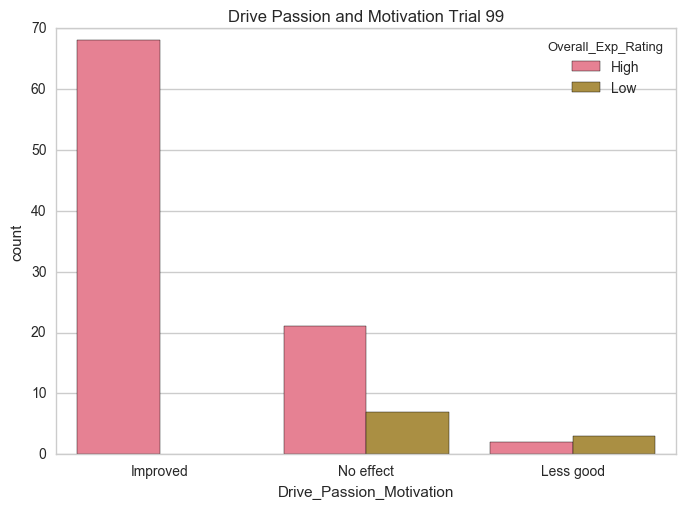

In [89]:
sns.countplot(x='Drive_Passion_Motivation',hue='Overall_Exp_Rating',  data=df_99, order=x_order2)
plt.title('Drive Passion and Motivation Trial 99')

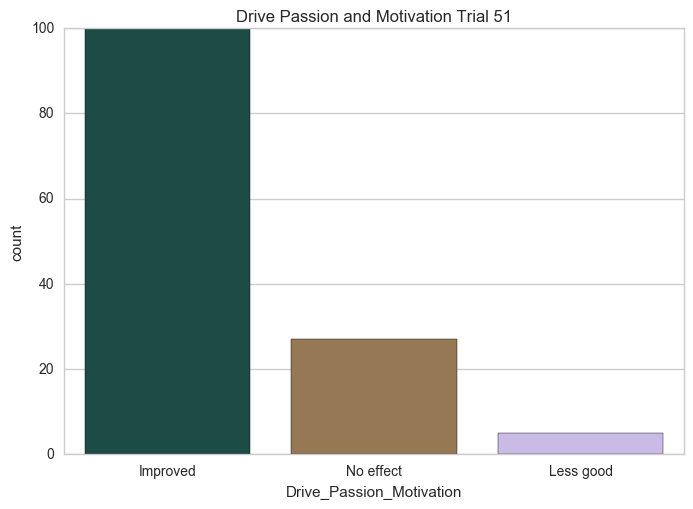

In [91]:
sns.countplot(x='Drive_Passion_Motivation', data=df_051, order=x_order2, palette='cubehelix')
plt.title('Drive Passion and Motivation Trial 51')

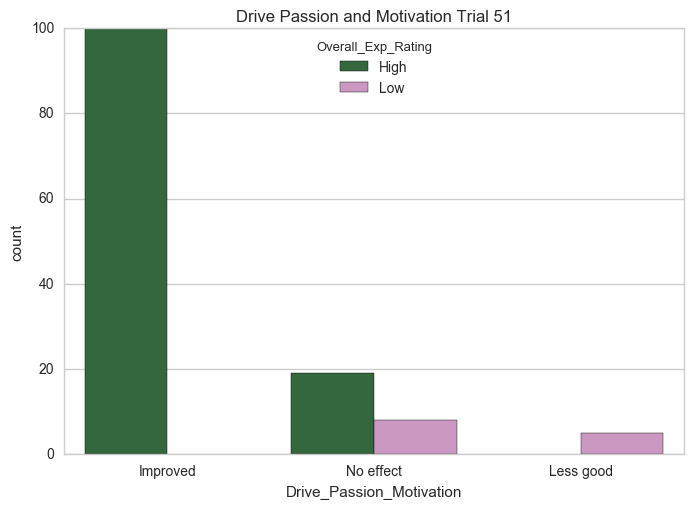

In [92]:
sns.countplot(x='Drive_Passion_Motivation',hue='Overall_Exp_Rating',  data=df_051, order=x_order2, palette='cubehelix')
plt.title('Drive Passion and Motivation Trial 51')

# Physical Energy

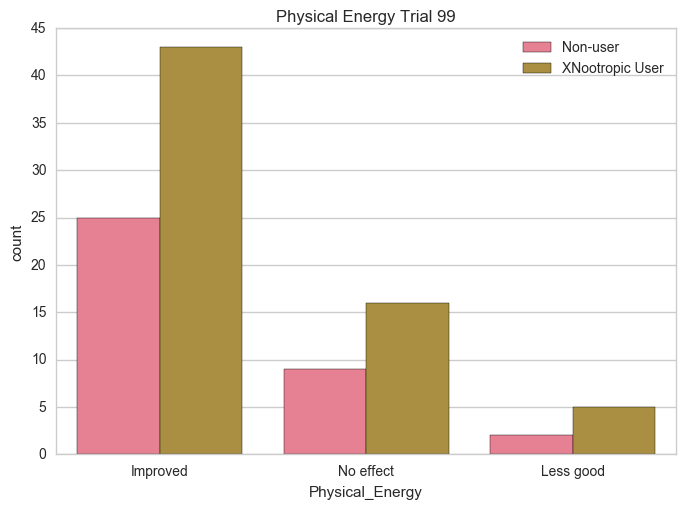

In [94]:
sns.countplot(x='Physical_Energy', data=df_99, hue='User_Status', order=x_order2)
plt.title('Physical Energy Trial 99')
plt.legend(loc='upper right')


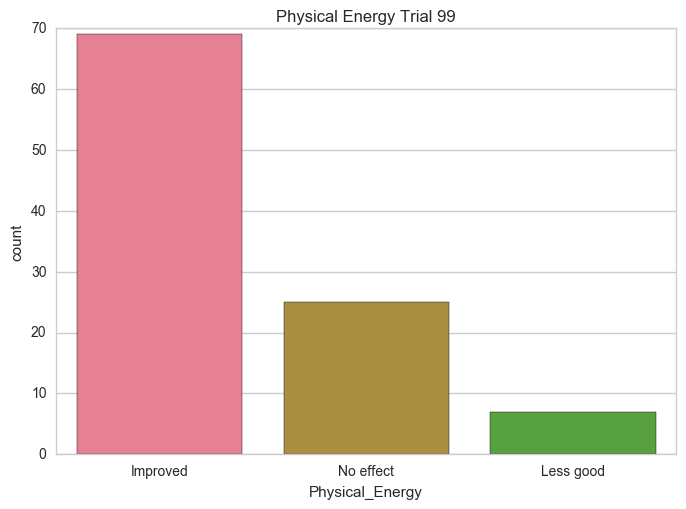

In [95]:
sns.countplot(x='Physical_Energy', data=df_99, order=x_order2)
plt.title('Physical Energy Trial 99')

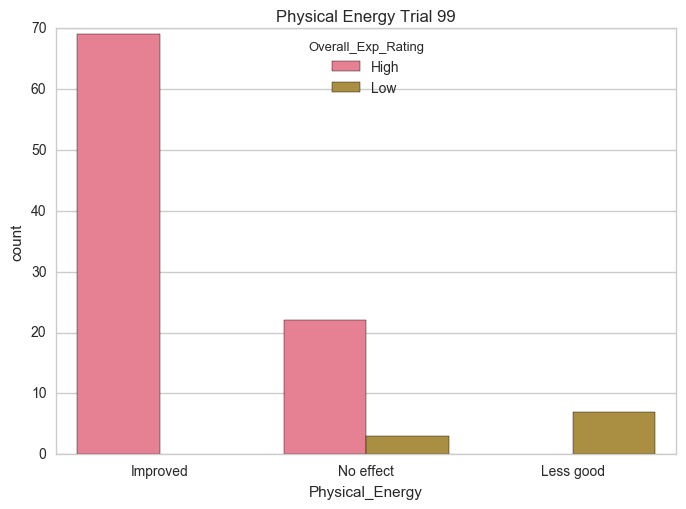

In [96]:
sns.countplot(x='Physical_Energy', hue='Overall_Exp_Rating', data=df_99, order=x_order2)
plt.title('Physical Energy Trial 99')

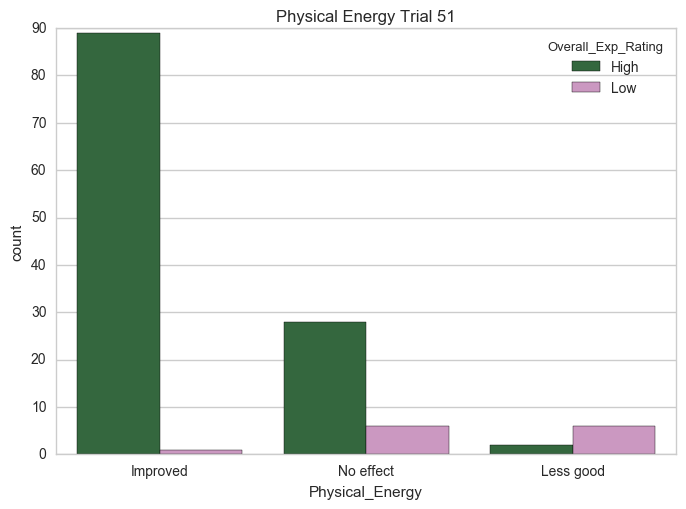

In [97]:
sns.countplot(x='Physical_Energy', hue='Overall_Exp_Rating', data=df_051, order=x_order2, palette='cubehelix')
plt.title('Physical Energy Trial 51')

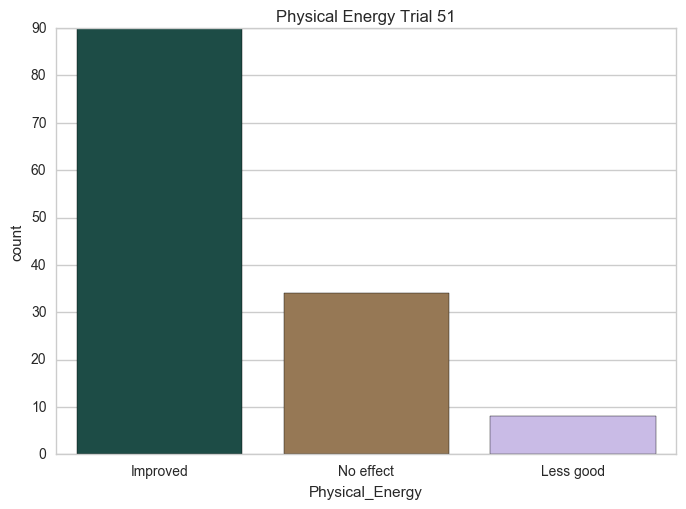

In [99]:
sns.countplot(x='Physical_Energy', data=df_051, order=x_order2, palette='cubehelix')
plt.title('Physical Energy Trial 51')

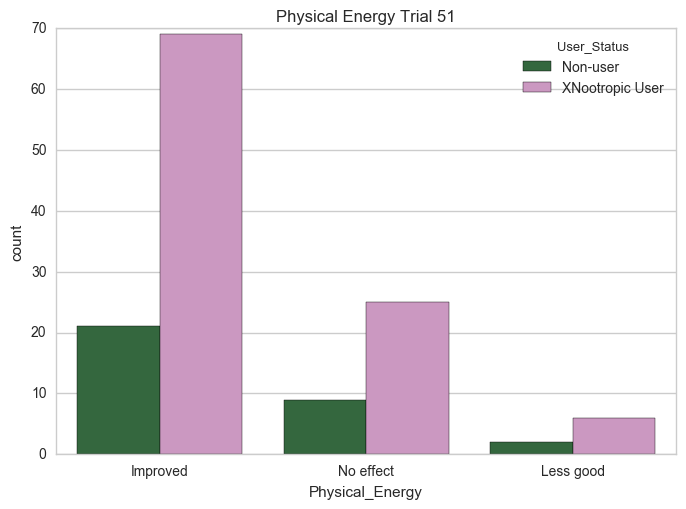

In [101]:
sns.countplot(x='Physical_Energy', data=df_051,hue='User_Status', order=x_order2, palette='cubehelix')
plt.title('Physical Energy Trial 51')

# Capacity for Productivity

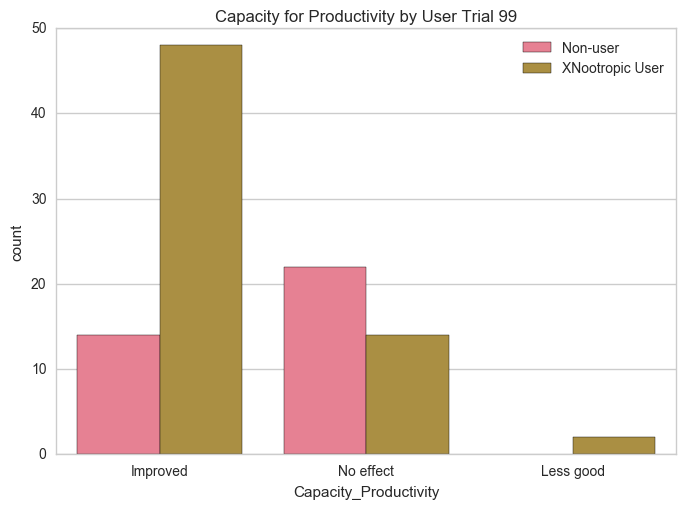

In [104]:
sns.countplot(x='Capacity_Productivity', data=df_99, hue='User_Status', order=x_order2)
plt.title('Capacity for Productivity by User Trial 99')
plt.legend(loc='upper right')

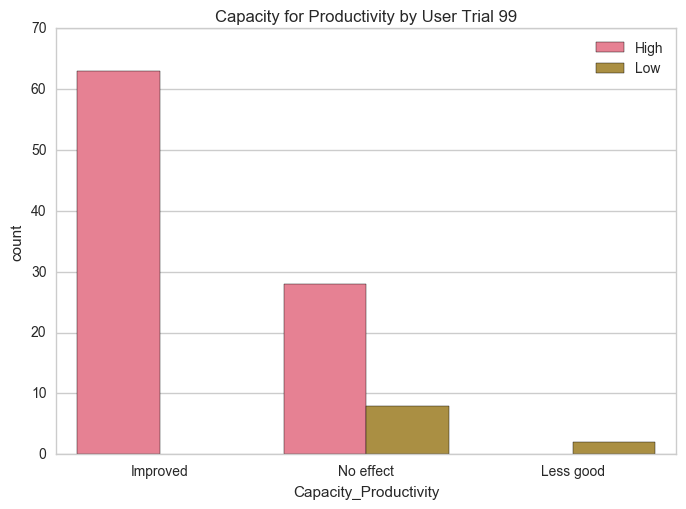

In [105]:
sns.countplot(x='Capacity_Productivity', data=df_99, hue='Overall_Exp_Rating', order=x_order2)
plt.title('Capacity for Productivity by User Trial 99')
plt.legend(loc='upper right')

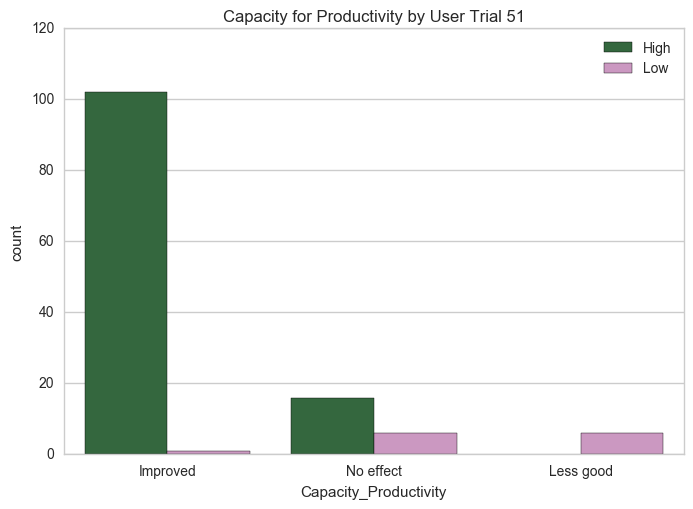

In [106]:
sns.countplot(x='Capacity_Productivity', data=df_051, hue='Overall_Exp_Rating', order=x_order2, palette='cubehelix')
plt.title('Capacity for Productivity by User Trial 51')
plt.legend(loc='upper right')

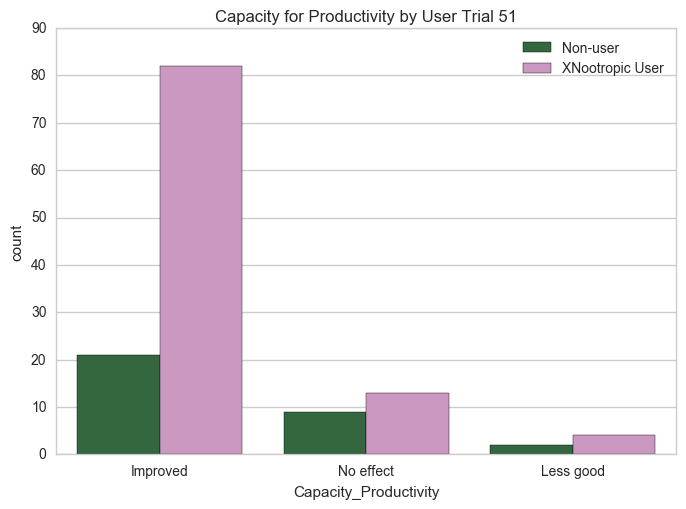

In [107]:
sns.countplot(x='Capacity_Productivity', data=df_051, hue='User_Status', order=x_order2, palette='cubehelix')
plt.title('Capacity for Productivity by User Trial 51')
plt.legend(loc='upper right')

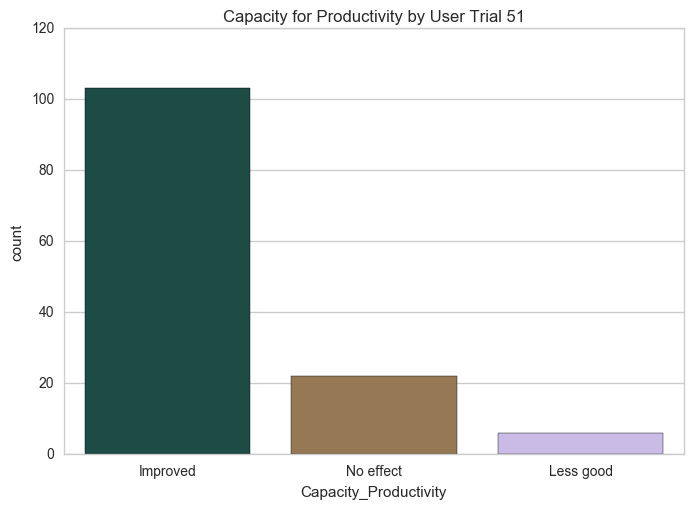

In [108]:
sns.countplot(x='Capacity_Productivity', data=df_051, order=x_order2, palette='cubehelix')
plt.title('Capacity for Productivity by User Trial 51')
plt.legend(loc='upper right')

# Decisiveness

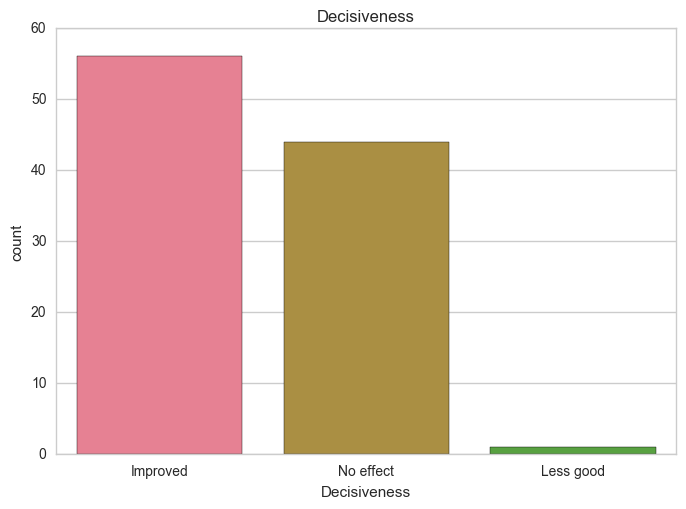

In [41]:
sns.countplot(x='Decisiveness', data=df_99, order=x_order2)
plt.title('Decisiveness')

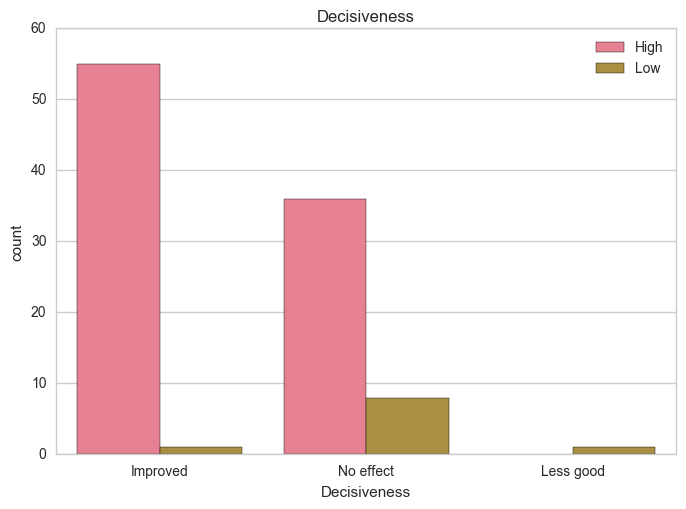

In [110]:
sns.countplot(x='Decisiveness', data=df_99, hue='Overall_Exp_Rating', order=x_order2)
plt.legend(loc='upper right')
plt.title('Decisiveness')

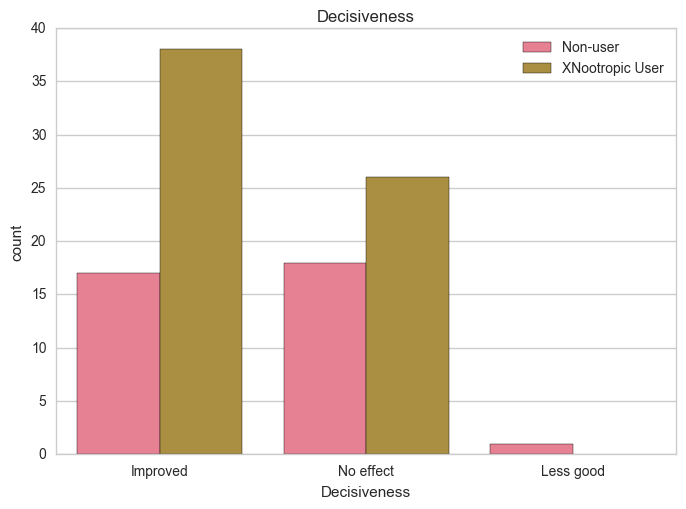

In [109]:
sns.countplot(x='Decisiveness', data=df_99, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Decisiveness')

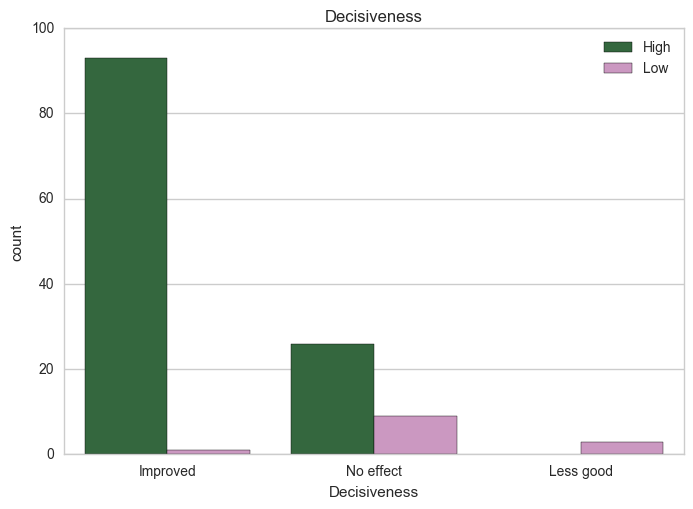

In [113]:
sns.countplot(x='Decisiveness', data=df_051, hue='Overall_Exp_Rating', order=x_order2, palette='cubehelix')
plt.legend(loc='upper right')
plt.title('Decisiveness')

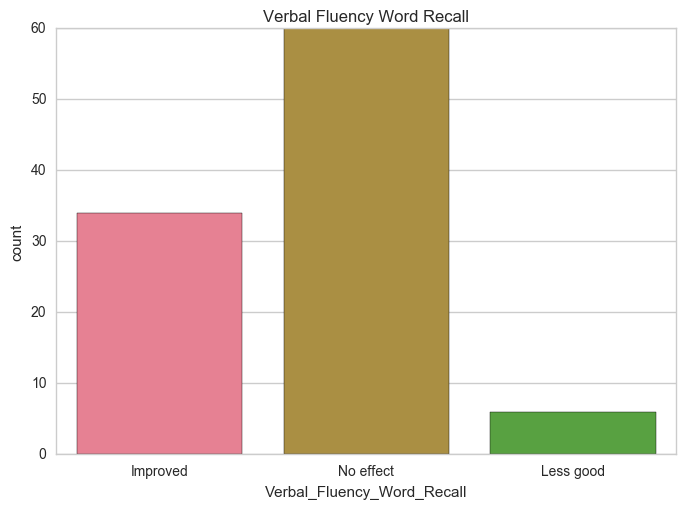

In [43]:
sns.countplot(x='Verbal_Fluency_Word_Recall', data=df_99, order=x_order2)
plt.title('Verbal Fluency Word Recall')

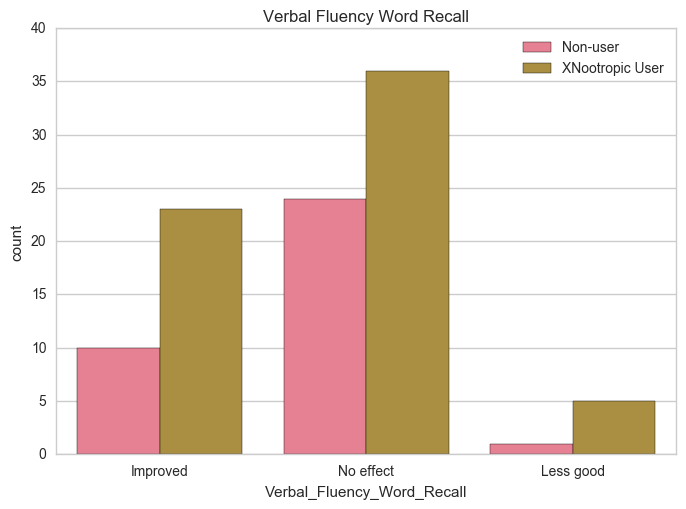

In [114]:
sns.countplot(x='Verbal_Fluency_Word_Recall', data=df_99, hue='User_Status', order=x_order2)
plt.legend(loc='upper right')
plt.title('Verbal Fluency Word Recall')

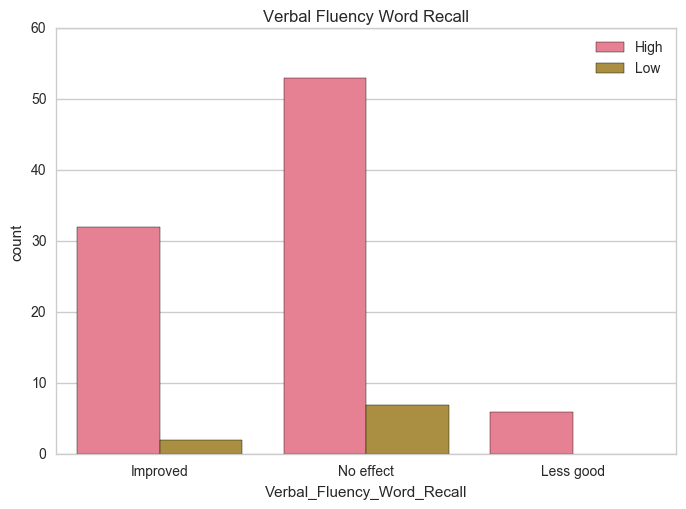

In [115]:
sns.countplot(x='Verbal_Fluency_Word_Recall', data=df_99, hue='Overall_Exp_Rating', order=x_order2)
plt.legend(loc='upper right')
plt.title('Verbal Fluency Word Recall')

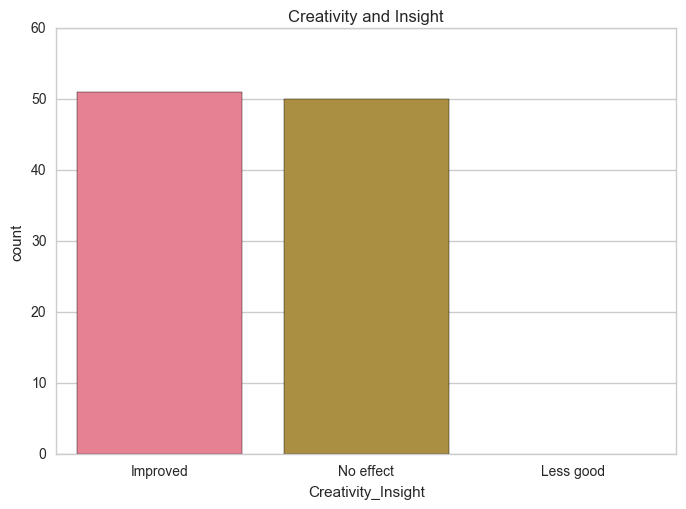

In [45]:
sns.countplot(x='Creativity_Insight', data=df_99, order=x_order2)
plt.title('Creativity and Insight')


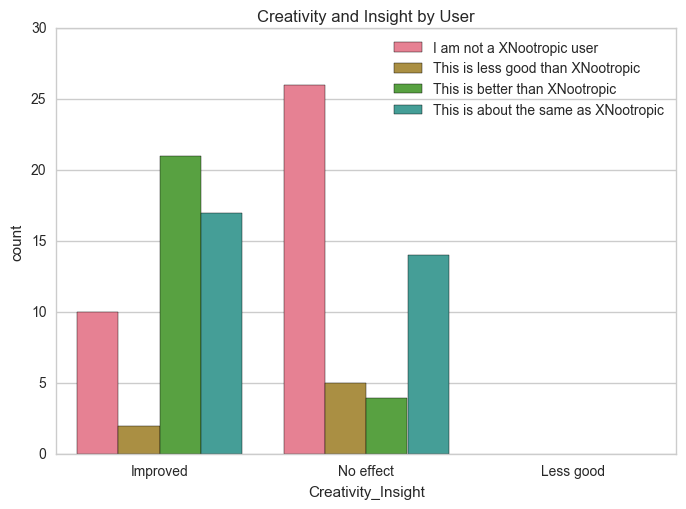

In [46]:
sns.countplot(x='Creativity_Insight', data=df_99, hue='Current_User_Comparison', order=x_order2)
plt.legend(loc='upper right')
plt.title('Creativity and Insight by User')

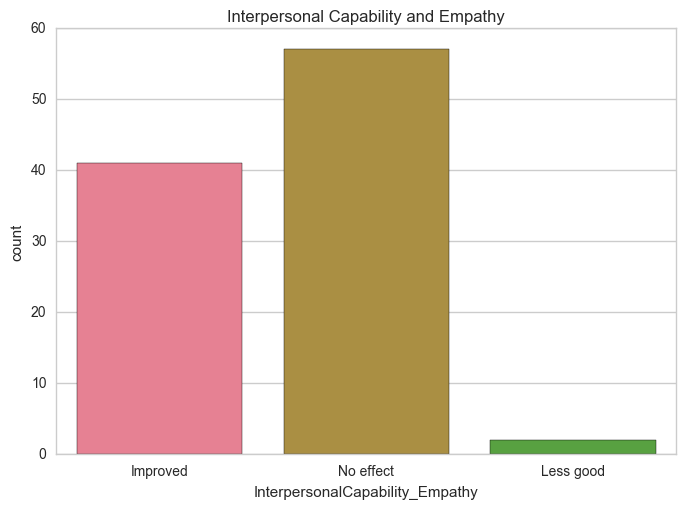

In [47]:
sns.countplot(x='InterpersonalCapability_Empathy', data=df_99, order=x_order2)
plt.title('Interpersonal Capability and Empathy')

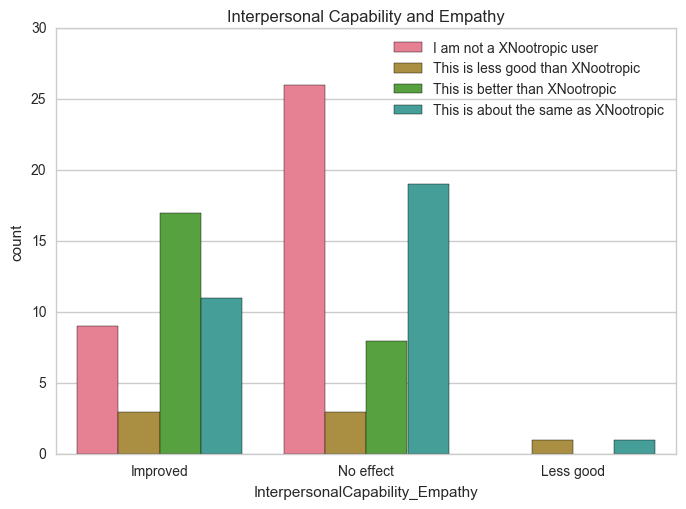

In [48]:
sns.countplot(x='InterpersonalCapability_Empathy', data=df_99, hue='Current_User_Comparison', order=x_order2)
plt.legend(loc='upper right')
plt.title('Interpersonal Capability and Empathy')

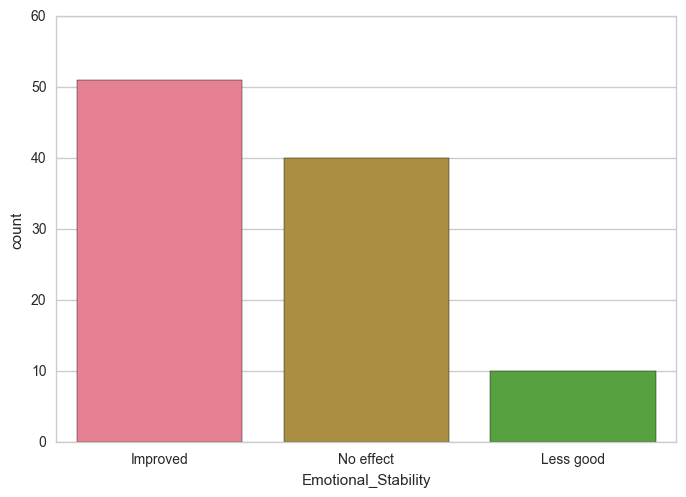

In [49]:
sns.countplot(x='Emotional_Stability', data=df_99, order=x_order2)


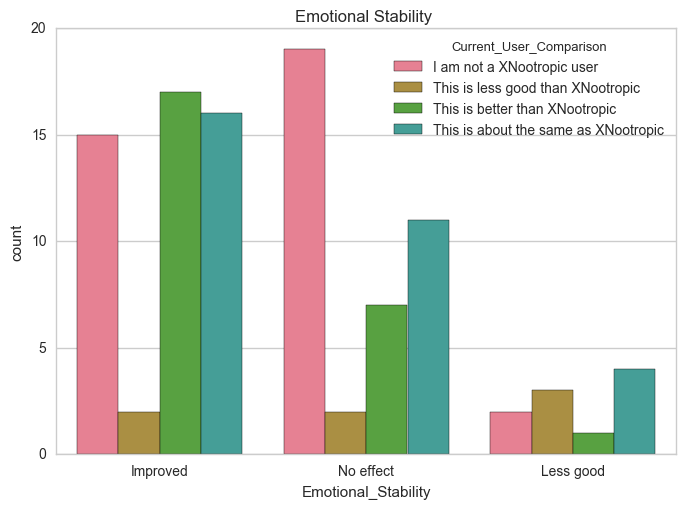

In [50]:
sns.countplot(x='Emotional_Stability', data=df_99, hue='Current_User_Comparison', order=x_order2)
plt.title('Emotional Stability ')

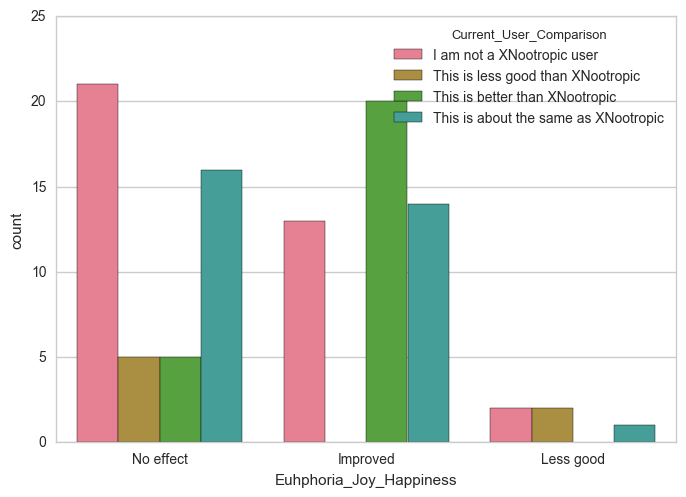

In [51]:
sns.countplot(x='Euhphoria_Joy_Happiness', data=df_99, hue='Current_User_Comparison')


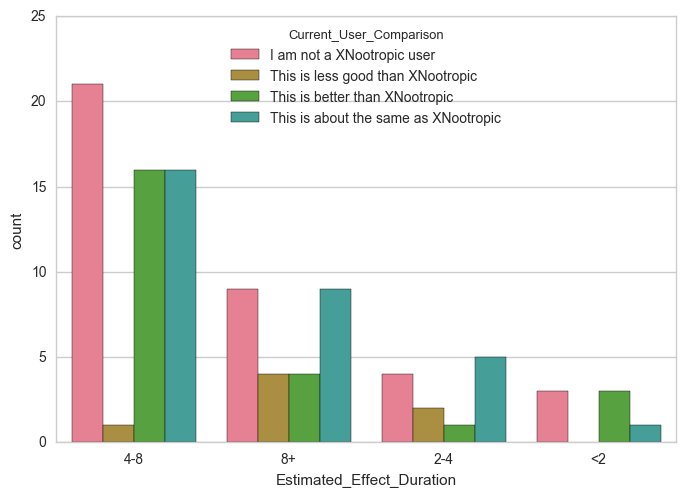

In [52]:
sns.countplot(x='Estimated_Effect_Duration', data=df_99, hue='Current_User_Comparison')


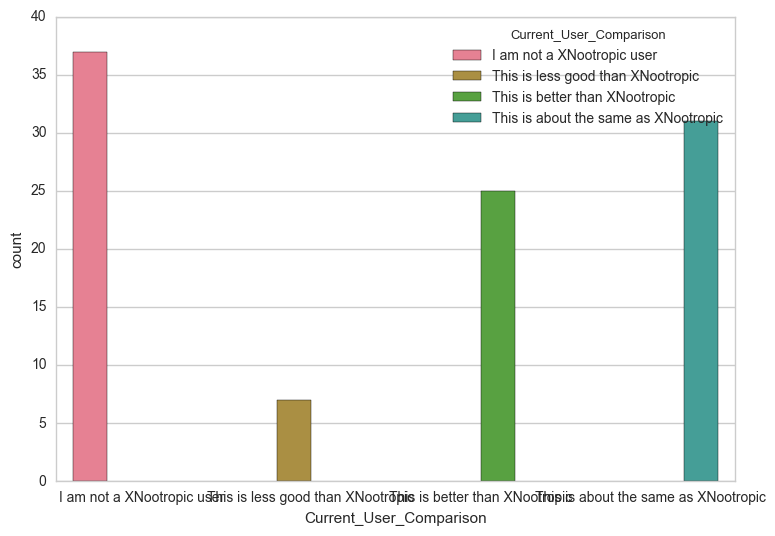

In [53]:
sns.countplot(x='Current_User_Comparison', data=df_99, hue='Current_User_Comparison')
plt.tight_layout()